In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Data Profiling
Data profiling is a process of reviewing the source data, understanding structure, and content interrelationships, and identifying potential for data projects.

House Dataset

In [ ]:
dataset = pd.read_csv('Housing.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df = dataset[['price','area']]

df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   545 non-null    int64
 1   area    545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


In [ ]:
df.isna().sum()

price    0
area     0
dtype: int64

## Data Cleaning
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In this Simple Linear Regression, the features used are the price and area columns. Where the two columns for the data type are appropriate. Then also no nan values in the row. So in the data cleaning stage there is no data that needs to be cleaned

## Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [ ]:
df.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


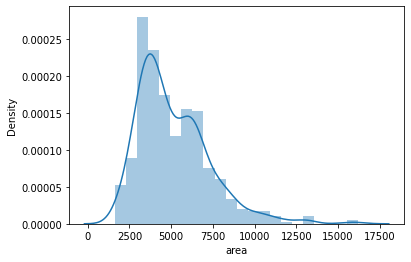

In [ ]:
sns.distplot(df['area']);

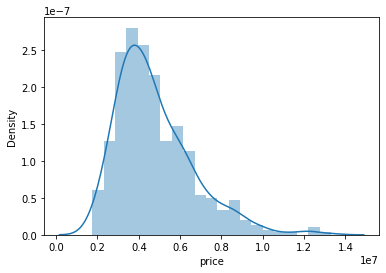

In [ ]:
sns.distplot(df['price']);

## Feature Engineering
Feature engineering is a Machine Learning preprocessing step, which is used to convert raw data into features that can be used to create predictive models using Machine Learning that aim to improve model performance.

Feature engineering in this case used MinMaxScaler(). MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [ ]:
scaler = MinMaxScaler()
df['area'] = scaler.fit_transform(df[['area']])

df.head()

,price,area
0,13300000,0.396564
1,12250000,0.502405
2,12250000,0.571134
3,12215000,0.402062
4,11410000,0.396564


## Preprocessing Data
Preprocessing model is a process of preparing the raw data and making it suitable for a machine learning model.

#### Feature important
Feature (variable) importance indicates how much each feature contributes to the model prediction. Basically, it determines the degree of usefulness of a specific variable for a current model and prediction

In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Modeling
Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([6194369.20020929])

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})

result.head()

,Actual,Predict
316,4060000,5.024060e+06
77,6650000,5.279498e+06
360,3710000,4.232203e+06
90,6440000,4.640903e+06
493,2800000,4.198144e+06


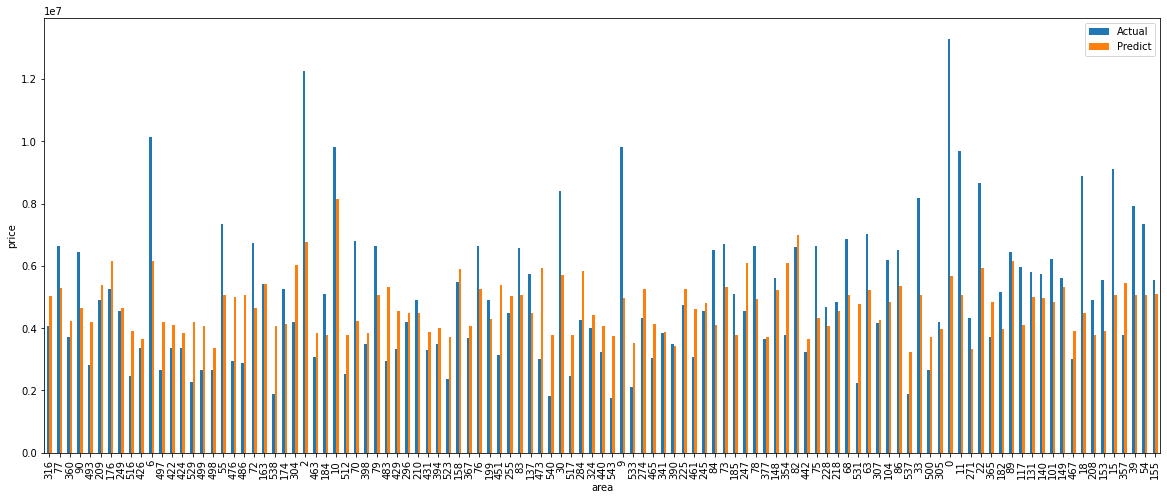

In [ ]:
result.plot(kind='bar', figsize=(20,8))
plt.xlabel('area')
plt.ylabel('price')
plt.show()

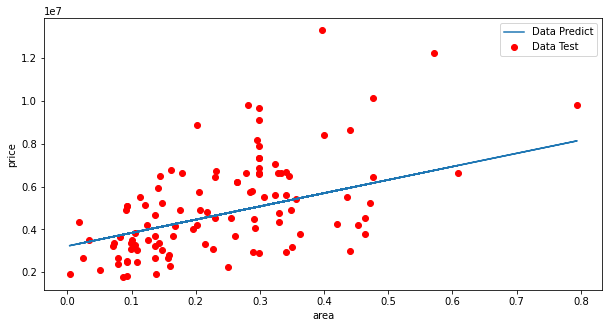

In [ ]:
df_ypred = pd.DataFrame(y_pred)
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='r', label='Data Test')
plt.plot(X_test, y_pred, label='Data Predict')
plt.xlabel('area')
plt.ylabel('price')
plt.legend();

## Evaluate Model
Evaluate model is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

In [ ]:
mean_absolute_error(y_test, y_pred)

1474748.1337969352

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.3227918802602231